In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import pickle
import gc
from tqdm.notebook import tqdm
from collections import deque

In [4]:
with open("simplified_data_v2/train_features.pkl",'rb') as f:
    X = pickle.load(f)
with open("simplified_data_v2/train_labels.pkl",'rb') as f:
    y = pickle.load(f)

In [12]:
y_scaled = y.clip(0,40)
y_scaled = np.log1p(y_scaled)/np.log1p(40)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled,test_size=0.2)


In [14]:
model_lstm = Sequential()
model_lstm.add(LSTM(256, input_shape=(2,19), return_sequences=True))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(units=1))
model_lstm.compile(loss='mse', optimizer='adam', metrics=['accuracy']) # Increase Learning rate by steps of 0.1
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 2, 256)            282624    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 364,865
Trainable params: 364,865
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model_lstm.fit(X_train, y_train, 
                         validation_data=(X_test, y_test), 
                         epochs=70, 
                         batch_size=50)

Train on 1799472 samples, validate on 449869 samples
Epoch 1/70
1799472/1799472 [==============================] - 321s 178us/sample - loss: 0.0138 - accuracy: 0.5598 - val_loss: 0.0136 - val_accuracy: 0.5592
Epoch 2/70
1799472/1799472 [==============================] - 324s 180us/sample - loss: 0.0135 - accuracy: 0.5599 - val_loss: 0.0136 - val_accuracy: 0.5591
Epoch 3/70
1799472/1799472 [==============================] - 326s 181us/sample - loss: 0.0133 - accuracy: 0.5599 - val_loss: 0.0134 - val_accuracy: 0.5592
Epoch 4/70
1799472/1799472 [==============================] - 326s 181us/sample - loss: 0.0132 - accuracy: 0.5599 - val_loss: 0.0133 - val_accuracy: 0.5592
Epoch 5/70
1799472/1799472 [==============================] - 316s 176us/sample - loss: 0.0131 - accuracy: 0.5599 - val_loss: 0.0132 - val_accuracy: 0.5592
Epoch 6/70
1799472/1799472 [==============================] - 317s 176us/sample - loss: 0.0130 - accuracy: 0.5599 - val_loss: 0.0132 - val_accuracy: 0.5592
Epoch 7/70


In [17]:
y_pre = model_lstm.predict(X_test)

In [22]:
Y_pre_unscaled = np.expm1(y_pre * np.log1p(40))
y_unscaled = np.expm1(y_test * np.log1p(40))

Val RMSE: 1.348


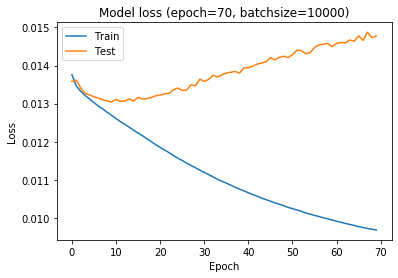

In [23]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt
rmse = sqrt(mean_squared_error(Y_pre_unscaled,y_unscaled))
print('Val RMSE: %.3f' % rmse)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss (epoch=70, batchsize=10000)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
model_lstm.save("LSTM_Model_v2.h5")

In [26]:
with open("LSTM_history_LSTM_model_v2.pkl",'wb') as f:
    pickle.dump(history.history,f)